# Qualitative Bankruptcy Prediction
by: Accever A. Mendoza

## Executive Summary

The data in this study is the qualitative bankruptcy data set from UCI [1]. We are to classify companies and predict bankruptcy or non-bankruptcy from qualitative features assessed by experts [2]. This study was inspired by the predictive system [3] where the algorithms used are Logistic Regression, Naive Bayes, Neural Networks, Random Forest and RBF Support Vector Machine. We then added kNN, Decision Trees and Gradient Boosting classifiers to potentially increase the test accuracy. In the previous paper, a 70% - 30% train test split was used. The test accuracy achieved is between 97.2% to a maximum of 99.6%. In this paper, we are able get a test accuracy of 97.5% up to 100%. The latter was achieved through Gradient Boosting Method. The top predictors of accuracy were Competitiveness and Credibility.

## Data Description

There are 250 instances in the data with 6 attributes correspnding to the qualitative parameters in bankruptcy.

| Feature | Description | Legend  |
|:-----:|:-----:|:-----:|:-----:|
| __Industrial Risk__ | Government policies and international agreements, competition, sensitivity to changes in macroeconomic factors and competitive power | Positive (P), Average (A), Negative (N)
| __Management risk__ | Ability and competence of the management, growth process and business performance, short term andlong term business planning | Positive (P), Average (A), Negative (N)
| __Financial Flexibility__ | Forms of financing | Positive (P), Average (A), Negative (N)
| __Credibility__ | Credit history, reliability of information and relationship with financial institutes | Positive (P), Average (A), Negative (N)
| __Competitiveness__ | Market position, level of core capacities and differentiated strategy | Positive (P), Average (A), Negative (N)
| __Operating Risk__ | Stability and diversity of procurement, transaction, efficiency of production, sales diversification, collection of A/R, effectiveness of sale network | Bankruptcy (B), Non-Bankruptcy (NB)

## Data Pre-Processing

We now look at the data and label the headers. Then we looked into the numbers of bankruptcy or non-bankruptcy to check whether undersampling (or oversampling) needs to be done. The data has a 40% - 60% proportion of bankruptcy and non-bankruptcy respectively.

We then proceeded to use `get_dummies` into the target column to convert the categorical variable. Drop_first was used so that we have ones for NB and zeros for B and remove the redundant feature.

For the other features in the data set, it was replaced with 0 for Negative, 0.5 for Average and 1 for Positive. This is similar to the concept of MinMaxScaler.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
df = pd.read_csv('Qualitative_Bankruptcy.data.txt', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [6]:
df.columns = ["Industrial Risk","Management Risk","Financial Flexibility",
              "Credibility", "Competitiveness", "Operating Risk", "Target"]
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Target
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [7]:
df['Target'].value_counts()

NB    143
B     107
Name: Target, dtype: int64

In [8]:
df['Target'] = pd.get_dummies(df['Target'], drop_first=True)
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Target
0,P,P,A,A,A,P,1
1,N,N,A,A,A,N,1
2,A,A,A,A,A,A,1
3,P,P,P,P,P,P,1
4,N,N,P,P,P,N,1


In [10]:
df.replace('N',0,axis=1, inplace=True)
df.replace('A',0.5,axis=1, inplace=True)
df.replace('P',1,axis=1, inplace=True)

df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4480: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warnings.warn('the "axis" argument is deprecated '


,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Target
0,1.0,1.0,0.5,0.5,0.5,1.0,1
1,0.0,0.0,0.5,0.5,0.5,0.0,1
2,0.5,0.5,0.5,0.5,0.5,0.5,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1
4,0.0,0.0,1.0,1.0,1.0,0.0,1


## Exploratory Data Analysis

We now looked into the pairplot of the features to have a visual check of possible predictors of the target.

We can see below that Competitiveness can somehow be clearly separate the Target. The same is true for Credibility and Financial Flexibility. We'll park this for now to see if we can use the following information for feature selection later on.

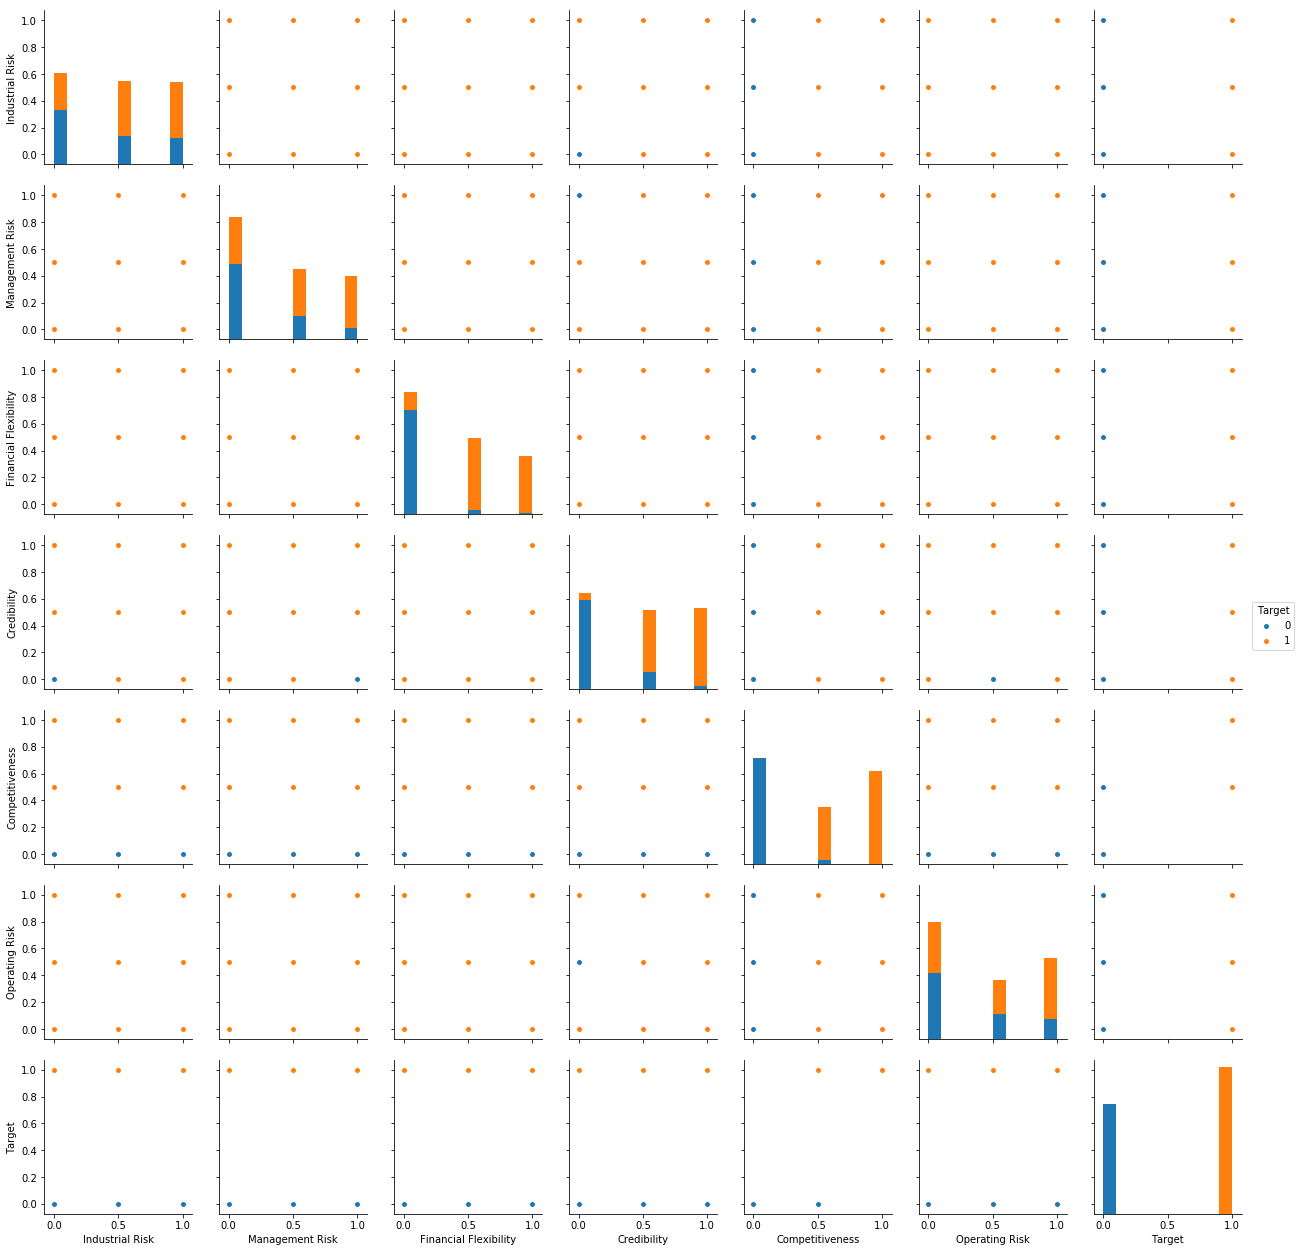

In [41]:
sns.pairplot(df, hue="Target")

We now achieved a score to beat of 63.795%. This is 1.25 times the Proportional Chance Criterion or the accuracy we need to beat inorder to say that what we have in our output is indeed a good predictor.

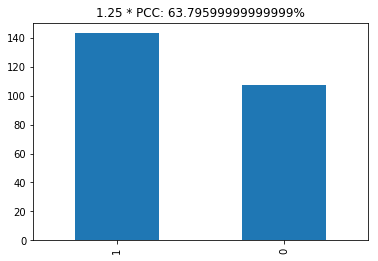

In [42]:
state_counts = Counter(df['Target'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', colormap='tab10')

pcc1 = (df_state[0]/df_state[0].sum())**2
score_to_beat = 1.25*100*pcc1.sum()
plt.title("1.25 * PCC: {}%".format(score_to_beat));
plt.legend().set_visible(False)

## Model

We use the machine learning models in the previous paper and added k-Nearest Neighbor, Decision Trees and Gradient Boosting classifier. We will go over the added models briefly.

__k-Nearest Neighbor__ is one of the simplest models in machine learning. It is non-parametric and instance based learning algorithm, meaning it does not explicitly learn the model

__Decision Trees__ is an algorithm where the data does not need scaling. Essentially, they learn a hierarchy of if-else questions leading to a decision.

__Gradient Boosting Method__ follows a weaker decision tree then learns from it, that's why it is one of the most powerful models. 

In [33]:
X = df.drop('Target', axis=1)
y = df['Target']

In [35]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

def knn_clf(X, y, n_neighbor_range=np.arange(1, 20)):
    param_grids = {'n_neighbors' : n_neighbor_range}
    clf = KNeighborsClassifier()
    gs_clf = GridSearchCV(clf, param_grids, n_jobs=-1, cv=50).fit(X, y)
    return pd.DataFrame(
        {'Params' : gs_clf.cv_results_['params'],
         'Test scores' : gs_clf.cv_results_['mean_test_score']}
                       ).sort_values(by='Test scores', 
                                     ascending=False).iloc[0,:].tolist()

def lin_clf(X, y, kind, C_range=[ 1e-4, 1e-3,0.1, 0.2,0.4, 
                            0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000]):
    param_grids = {'penalty' : ('l1', 'l2'), 'C' : C_range}
    if kind == 'logistic':    
        clf = LogisticRegression(dual=False)
    if kind == 'lin_svc':
        clf = LinearSVC(dual=False)
    gs_clf = GridSearchCV(clf, param_grids, n_jobs=-1, cv=50).fit(X, y)
    return pd.DataFrame(
        {'Params' : gs_clf.cv_results_['params'],
         'Test scores' : gs_clf.cv_results_['mean_test_score']}
                       ).sort_values(by='Test scores', 
                                     ascending=False).iloc[0,:].tolist()

def non_lin_svm_clf(X, y, C_range=[ 1e-4, 1e-3,0.1, 0.2,0.4, 
                            0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000],
                gamma_range=np.arange(0.1,2.1,0.1), degree_range=[2,3,4]):
    
    param_grids = [{'kernel' : ['rbf'], 'C' : C_range, 
                   'gamma' : gamma_range},
                   {'kernel' : ['poly'], 'C' : C_range, 
                   'gamma' : gamma_range, 'degree' : degree_range}]    
    clf = SVC()
    gs_clf = GridSearchCV(clf, param_grids, n_jobs=-1, cv=50).fit(X, y)
    return pd.DataFrame(
        {'Params' : gs_clf.cv_results_['params'],
         'Test scores' : gs_clf.cv_results_['mean_test_score']}
                       ).sort_values(by='Test scores', 
                                     ascending=False).iloc[0,:].tolist()

def trees_clf(X, y, kind, max_depth_range=np.arange(2, 8), 
              learning_rate_range=np.arange(0.1, 2.1, 0.1), 
              max_feat_gb=[3,4,5]):
    if kind == 'des_tree':
        param_grids = {'max_depth' : max_depth_range}
        clf = DecisionTreeClassifier()
    if kind == 'rand_for':
        mfeat = int(np.sqrt(X.shape[1]))
#         param_grids = {'max_depth' : max_depth_range, 
#                        'max_features' : np.arange(mfeat - 2, mfeat)}
        param_grids = {'max_depth' : max_depth_range, 
                       'max_features' : [3,4]}
        clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    if kind == 'grad_boost':
        param_grids = {'learning_rate' : learning_rate_range, 
                       'max_depth' : max_depth_range, 
                       'max_features' : max_feat_gb}
        clf = GradientBoostingClassifier(n_estimators=100)
    gs_clf = GridSearchCV(clf, param_grids, n_jobs=-1, cv=50).fit(X, y)
    return pd.DataFrame(
        {'Params' : gs_clf.cv_results_['params'],
         'Test scores' : gs_clf.cv_results_['mean_test_score']}
                       ).sort_values(by='Test scores', 
                                     ascending=False).iloc[0,:].tolist()

def nb_clf(X, y):
    clf = GaussianNB()
    test_acc = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.25,
                                                            random_state=i)
        clf.fit(X_train, y_train)
        test_acc.append(clf.score(X_test,y_test))
    return np.mean(test_acc)

In [36]:
knn_res = knn_clf(X, y, 
            n_neighbor_range=np.arange(1, 20))
#print('knn Done!')
log_res = lin_clf(X, y, 
            'logistic', C_range=[ 1e-4, 1e-3,0.1, 0.2,0.4, 
                            0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000])
#print('logistic reg Done!')
lin_svc_res = lin_clf(X, y, 
            'lin_svc', C_range=[ 1e-4, 1e-3,0.1, 0.2,0.4, 
                            0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000])
#print('lin svc Done!')
non_lin_svc_res = non_lin_svm_clf(X, y,
                C_range=[ 1e-4, 1e-3,0.1, 0.2,0.4, 
                            0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000],
                gamma_range=np.arange(0.1,2.1,0.1), degree_range=[2,3,4])
#print('nonlin svc Done!')
des_t_res = trees_clf(X, y,
              'des_tree', max_depth_range=np.arange(2, 8))
#print('des trees Done!')
rand_f_res = trees_clf(X, y,
              'rand_for', max_depth_range=np.arange(2, 5))
#print('rand forest Done!')
grad_b_ref = trees_clf(X, y,
              'grad_boost', max_depth_range=np.arange(2, 5), 
              learning_rate_range=np.arange(0.1, 0.5, 0.1), 
              max_feat_gb=[3,4])
#print('grad boost Done!')
nb_res = nb_clf(X, y)
#print('bayes Done!')

In [46]:
res = pd.DataFrame([[knn_res[1], knn_res[0]],
                    [log_res[1], log_res[0]],
                    [lin_svc_res[1], lin_svc_res[0]],
                    [non_lin_svc_res[1], non_lin_svc_res[0]],
                    [des_t_res[1], des_t_res[0]],
                    [rand_f_res[1], rand_f_res[0]],
                    [grad_b_ref[1], grad_b_ref[0]],
                    [nb_res, 'NA']], 
                   index=['k-Nearest Neighbors', 'Logistic Regression', 
                        'Linear SVC', 'Non-linear SVC', 
                        'Decision Trees', 'Random Forest', 'Gradient Boosting',
                         'Naive Bayes'],
                   columns=['Test Accuracy', 'Best Parameters'])
res

,Test Accuracy,Best Parameters
k-Nearest Neighbors,0.996000,{'n_neighbors': 1}
Logistic Regression,0.996000,"{'C': 3, 'penalty': 'l1'}"
Linear SVC,0.996000,"{'C': 0.75, 'penalty': 'l1'}"
Non-linear SVC,0.996000,"{'C': 1000, 'gamma': 1.4000000000000001, 'kern..."
Decision Trees,0.992000,{'max_depth': 3}
Random Forest,0.996000,"{'max_depth': 3, 'max_features': 4}"
Gradient Boosting,1.000000,"{'learning_rate': 0.1, 'max_depth': 2, 'max_fe..."
Naive Bayes,0.975556,NA


In [49]:
grad_b_ref[0]

{'learning_rate': 0.1, 'max_depth': 2, 'max_features': 3}

We now look into the top predictors of the data. Decision tree is not the model with highest accuracy but we use it for interpretability of results. We can see from the Decision Tree below that we have Competitiveness and Credibitlity as the top predictors.

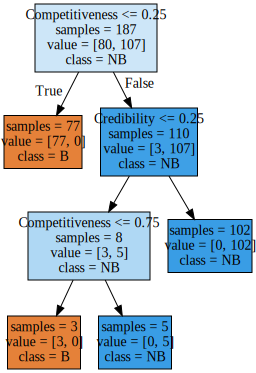

In [47]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="mytree.dot", class_names=["B", "NB"],
feature_names=X_train.columns, impurity=False, filled=True)

import graphviz
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Conclusion

Using all the features in the dataset, we are able to predict if a company is going under. Using the Gradient Boosting Method, we are able to predict with a test accuracy of up to 100% with a learning rate of 0.1, max_depth of 2 and max_features of 3. We are able to create a better algorithm than the previous paper [3]. 

We are also able to show in this paper that competitiveness, which refers to differentiated stategy, and credibility, in terms of credit score, are the top predictors. Companies need to highlight these factors and make sure that they are always positive so as not to go bankrupt and prevent financial crisis.

## References

[1] https://archive.ics.uci.edu/ml/datasets/qualitative_bankruptcy  
[2] http://neuron.csie.ntust.edu.tw/homework/95/neuron/homework/Homework%233/M9509007/paper/5.htm  
[3] https://arxiv.org/pdf/1502.03601.pdf